In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
fits_file = "tpf/tess-s0001-3-3_36.820737_-82.019560_64x64_astrocut.fits"

In [9]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '4096J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(64, 64)'
    name = 'FLUX'; format = '4096E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(64, 64)'
    name = 'FLUX_ERR'; format = '4096E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(64, 64)'
    name = 'FLUX_BKG'; format = '4096E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(64, 64)'
    name = 'FLUX_BKG_ERR'; format = '4096E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(64, 64)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'FFI_FILE'; format = '38A'; unit = 'pixel'
)

In [10]:
with fits.open(fits_file, mode="readonly") as hdulist:
    flux = hdulist[1].data["FLUX"]
    flux_err = hdulist[1].data["FLUX_ERR"]

In [12]:
im_flux = flux[0]
im_err = flux_err[0]

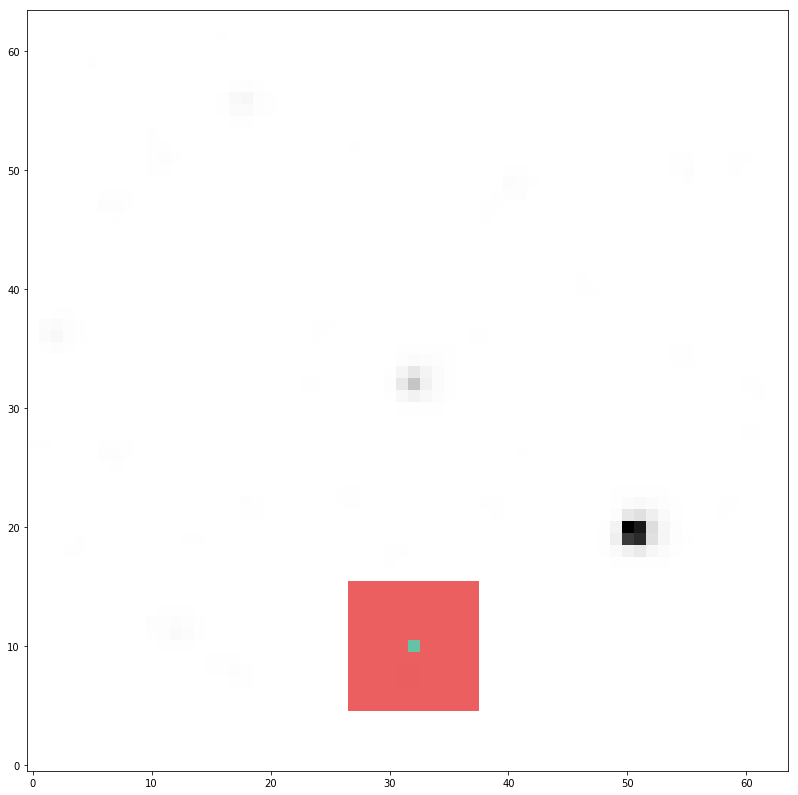

In [236]:
pred_pix_x = 10
pred_pix_y = 32

exc_region = 5 # number of pixels to exclude from prediction pixel

plt.figure(figsize=(14, 14))
plt.imshow(im_flux, origin="lower", cmap="Greys")
pixels = np.zeros(im_flux.shape)
pixels[pred_pix_x-exc_region:pred_pix_x+exc_region+1, pred_pix_y-exc_region:pred_pix_y+exc_region+1] = 1
mask = np.ma.masked_where(pixels == 0, pixels)
# print(mask.tolist())
plt.imshow(mask, origin="lower", cmap="Set1", alpha=0.7)
pred_pix = np.zeros(im_flux.shape)
pred_pix[pred_pix_x, pred_pix_y] = 1
pred_pix_mask = np.ma.masked_where(pred_pix == 0, pred_pix)
plt.imshow(pred_pix_mask, origin="lower", cmap="Set2")

In [237]:
def choose_n_valid_pixel(n, x, y, exc_region):
    idx_list = []
    exclusion_x = range(x-exc_region, x+exc_region+1)
    exclusion_y = range(y-exc_region, y+exc_region+1)
    while (len(idx_list) != n):
        coordinate = [np.random.randint(64), np.random.randint(64)]
        if (coordinate[0] in exclusion_x) and (coordinate[1] in exclusion_y):
            continue
        idx_list.append(coordinate)
    return np.array(idx_list)

In [253]:
n = 300
valid_pixels = choose_n_valid_pixel(n, pred_pix_x, pred_pix_y, exc_region)  # 2 rows, n columns

In [254]:
chosen_pixels = np.zeros((64,64))
chosen_pixels[valid_pixels.T[0], valid_pixels.T[1]] = 1

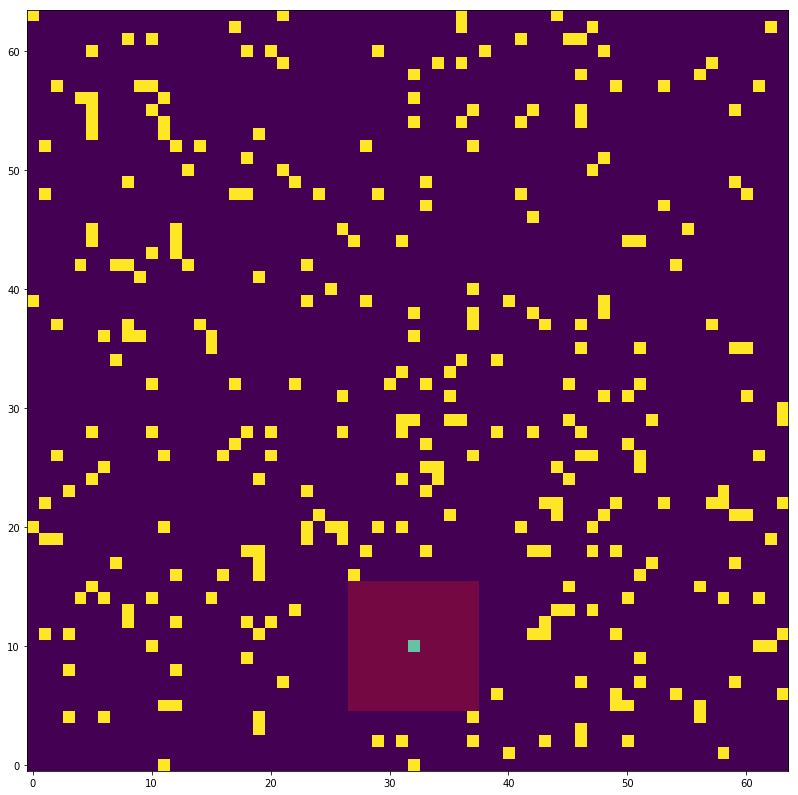

In [255]:
plt.figure(figsize=(14, 14))
plt.imshow(chosen_pixels, origin="lower")
plt.imshow(mask, origin="lower", cmap="Set1", alpha=0.3)
plt.imshow(pred_pix_mask, origin="lower", cmap="Set2")

In [208]:
chosen_flux = im_flux[valid_pixels.T[0], valid_pixels.T[1]]
chosen_err = im_err[valid_pixels.T[0], valid_pixels.T[1]]